## Unsupervised Learning

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns

### 載入資料集

In [159]:
data = pd.read_csv('water_potability.csv')
data.head(n = 2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


### 去掉 NaN 值

In [160]:
newdata = data.dropna()
newdata.head(n = 2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### 去掉 Potability

In [161]:
X = newdata.drop(columns=['Potability'])

### 去掉 Potability 的值列出來

In [162]:
X.head(n = 2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [163]:
print(X)

             ph    Hardness  ...  Trihalomethanes  Turbidity
3      8.316766  214.373394  ...       100.341674   4.628771
4      9.092223  181.101509  ...        31.997993   4.075075
5      5.584087  188.313324  ...        54.917862   2.559708
6     10.223862  248.071735  ...        84.603556   2.672989
7      8.635849  203.361523  ...        62.798309   4.401425
...         ...         ...  ...              ...        ...
3267   8.989900  215.047358  ...        55.069304   4.613843
3268   6.702547  207.321086  ...        28.878601   3.442983
3269  11.491011   94.812545  ...        41.558501   4.369264
3270   6.069616  186.659040  ...        60.419921   3.669712
3271   4.668102  193.681736  ...        66.687695   4.435821

[2011 rows x 9 columns]


In [164]:
from sklearn.cluster import KMeans

#kmeansModel = KMeans(n_clusters = 3, random_state = 46)
kmeansModel = KMeans(n_clusters = 5, random_state=46)
clusters_pred = kmeansModel.fit_predict(X)

C:\Users\J\.conda\envs\ML0\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [165]:
kmeansModel.inertia_

11344249328.787613

kmeansModel.cluster_centers_

In [166]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, clusters_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5253548813796294


## GaussianMixture

In [167]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Assuming you have already loaded your data
data = pd.read_csv('water_potability.csv')

# Drop rows with missing values
newdata = data.dropna()

# Extract features (X)
X = newdata.drop(columns=['Potability'])

# Create GMM instance
gmm_model = GaussianMixture(n_components = 3, random_state=46)

# Fit the model to your data
clusters_pred = gmm_model.fit_predict(X)

# Get silhouette score
silhouette_avg = silhouette_score(X, clusters_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.08443755763911577


## ************************************************************************************************************************* 
### T-SNE
### silhouette_score 是一個衡量聚類模型效能的指標，但是 t-SNE 並不是一個聚類模型，因此沒有 silhouette score。t-SNE 主要用於視覺化高維數據，它嘗試將相似的樣本映射到低維空間中的相鄰位置，但不提供聚類的概念

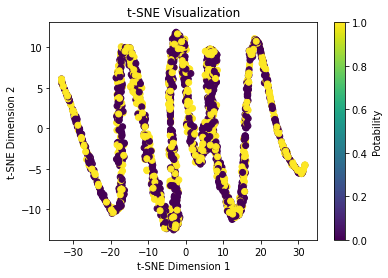

In [179]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have already loaded your data
data = pd.read_csv('water_potability.csv')

# Drop rows with missing values
newdata = data.dropna()

# Extract features (X)
X = newdata.drop(columns=['Potability'])

# Create t-SNE instance
tsne_model = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3000)

# Fit the model to your data and transform it to lower-dimensional space
X_tsne = tsne_model.fit_transform(X)

# Visualize the data in 2D
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=newdata['Potability'], cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Potability')
plt.show()

## Clustering Algorithms:
    K-Means
    Hierarchical Clustering
    DBSCAN
    Gaussian Mixture Models(GMM)
## Dimensionality Reduction Algorithms:
    PCA
    LDA
    t_SNE
    

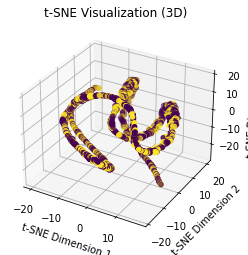

In [178]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have already loaded your data
data = pd.read_csv('water_potability.csv')

# Drop rows with missing values
newdata = data.dropna()

# Extract features (X)
X = newdata.drop(columns=['Potability'])

# Create t-SNE instance
tsne_model = TSNE(perplexity=30, n_components=3, init='random', n_iter=5000)

# Fit the model to your data and transform it to lower-dimensional space
X_tsne = tsne_model.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=newdata['Potability'], cmap='viridis')
ax.set_title('t-SNE Visualization (3D)')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

### T-SNE Setting
    n_iter：int，可選（預設值：1000）最佳化的最大迭代次數。至少應該200。
    n_components：int，可選（預設值：2）嵌入式空間的維度。
    perplexity：浮點型，可選（預設：30）較大的資料集通常需要更大的perplexity。考慮選擇一個介於5和50之間的值。由於t-SNE對這個參數非常不敏感，所以選擇並不是非常重要。